In [3]:
import pandas as pd
import glob
import os
import numpy as np
import re

# Paths
results_dir = "/home/sagnik/Research/DP_transformer/results_high_dim_vary_eps"
combined_csv = os.path.join(results_dir, "combined_eps_vs_n.csv")

# Locate files
csv_files = sorted(glob.glob(os.path.join(results_dir, "results_N*.csv")))

records = []

# Process each file
for file in csv_files:
    match = re.search(r"results_N(\d+)\.csv", os.path.basename(file))
    if match:
        N_val = int(match.group(1))
        df = pd.read_csv(file)
        df["N"] = N_val  # Ensure N column exists/overwritten
        records.append(df)

# Combine all into one DataFrame
df_all = pd.concat(records, ignore_index=True)

# Save combined CSV
df_all.to_csv(combined_csv, index=False)

print(f"Combined file saved to {combined_csv}")

Combined file saved to /home/sagnik/Research/DP_transformer/results_high_dim_vary_eps/combined_eps_vs_n.csv


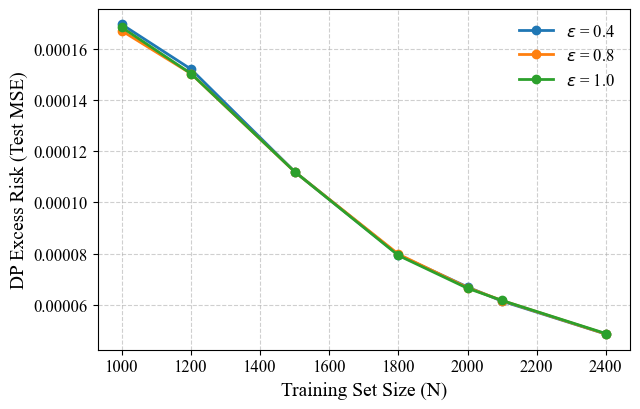

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Load the combined CSV
df = df_all

# Setup plot style
mpl.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["Times New Roman", "DejaVu Serif"],
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.6
})

# Extract sorted lists
epsilon_lst = sorted(df["epsilon"].unique())
N_lst_sorted = sorted(df["N"].unique())

# Plot avg_dp_excess vs N for different eps
plt.figure(figsize=(6.5, 4.2))
for eps in epsilon_lst:
    df_eps = df[df["epsilon"] == eps].sort_values("N")
    plt.plot(df_eps["N"], np.log(df_eps["avg_dp_excess"]), marker='o', label=f"$\\varepsilon$ = {eps}")

plt.xlabel("Training Set Size (N)")
plt.ylabel("DP Excess Risk (Test MSE)")
plt.legend(loc="upper right", frameon=False)
plt.tight_layout()
plt.savefig("dp_excess_risk_vs_N.pdf")
plt.show()